# Choose to tip at a restaurant using Fuzzy Inference System (FIS)
Let’s create a fuzzy control system which models how you might choose to tip at a restaurant. When tipping, you consider the service and food quality, rated between 0 and 10. You use this to leave a tip of between 0 and 25%.

In [4]:
pip install -U scikit-fuzzy

   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 10.2/920.8 kB ? eta -:--:--
    -------------------------------------- 20.5/920.8 kB 217.9 kB/s eta 0:00:05
   - ------------------------------------- 30.7/920.8 kB 262.6 kB/s eta 0:00:04
   -- ------------------------------------ 51.2/920.8 kB 327.7 kB/s eta 0:00:03
   ---- --------------------------------- 102.4/920.8 kB 535.8 kB/s eta 0:00:02
   ------- ------------------------------ 184.3/920.8 kB 794.9 kB/s eta 0:00:01
   ----------- -------------------------- 286.7/920.8 kB 983.9 kB/s eta 0:00:01
   ------------------- -------------------- 450.6/920.8 kB 1.3 MB/s eta 0:00:01
   ----------------------- ---------------- 532.5/920.8 kB 1.4 MB/s eta 0:00:01
   --------------------------------- ------ 778.2/920.8 kB 1.9 MB/s eta 0:00:01
   ------------------------------------- -- 870.4/920.8 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------  911.4/920.8 k

## Libraries

In [15]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Fuzzification

In [45]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality['low'] = fuzz.trimf(quality.universe, [0, 0, 5])
quality['medium'] = fuzz.trimf(quality.universe, [0, 5, 10])
quality['high'] = fuzz.trimf(quality.universe, [5, 10, 10])

service['low'] = fuzz.trimf(service.universe, [0, 0, 5])
service['medium'] = fuzz.trimf(service.universe, [0, 5, 10])
service['high'] = fuzz.trimf(service.universe, [5, 10, 10])
# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

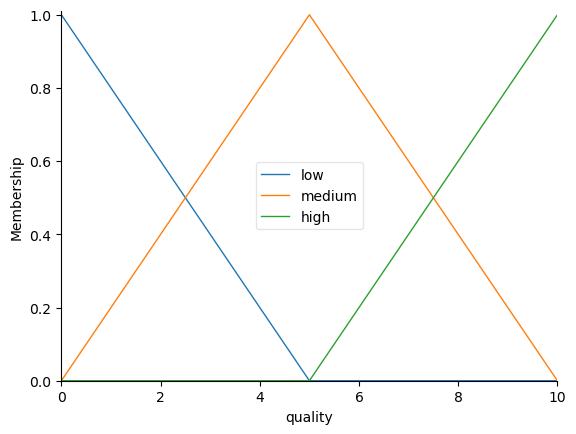

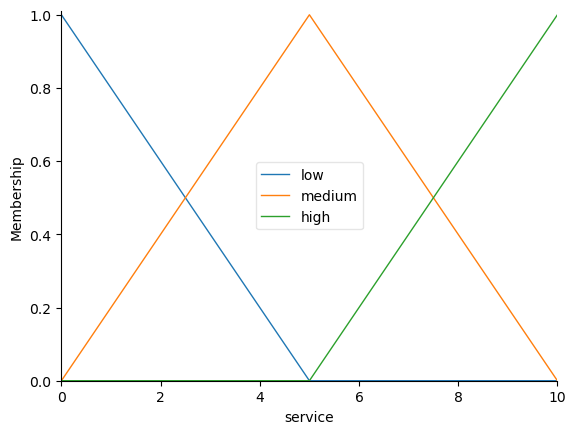

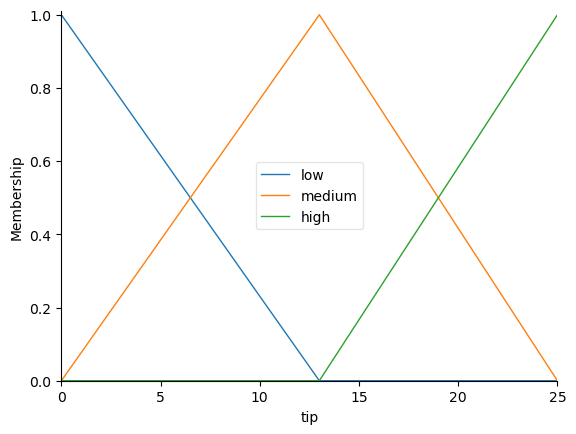

In [46]:
# You can see how these look with .view()
quality.view()
service.view()
tip.view()

## Fuzzy rules
Now, to make these triangles useful, we define the fuzzy relationship between input and output variables. For the purposes of our example, consider three simple rules:

- 1. If the food is poor OR the service is poor, then the tip will be low
- 2. If the service is average, then the tip will be medium
- 3. If the food is good OR the service is good, then the tip will be high.
  
Most people would agree on these rules, but the rules are fuzzy. Mapping the imprecise rules into a defined, actionable tip is a challenge. This is the kind of task at which fuzzy logic excels.

In [64]:
rule1 = ctrl.Rule(quality['low'] | service['low'], tip['low'])
rule2 = ctrl.Rule(service['medium'], tip['medium'])
rule3 = ctrl.Rule(service['high'] | quality['high'], tip['high'])

In [65]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [66]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [67]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()

## Defuzzification: Obtain crisp output

Crisp output: 19.847607361963192


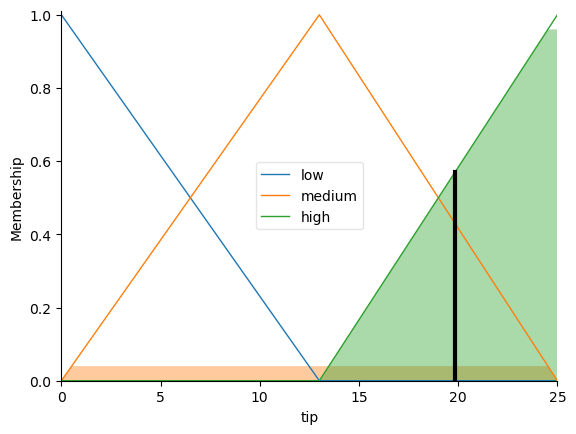

In [68]:
result = tipping.output['tip']
print("Crisp output:", result)
tip.view(sim=tipping)

In [71]:
result = tipping.output['tip']
result = np.asarray(result)
result_range = np.arange(0, 11, 1)[:result.size]
defuzzified_output = fuzz.defuzz(result_range, result, 'centroid')
print("Defuzzified output:", defuzzified_output)

Defuzzified output: 0.0


If the result of defuzzification is 0, it means that, based on the fuzzy logic inference, the crisp output value determined by the centroid method falls at the lowest end of the range of possible output values.